#### ΧΡΙΣΤΙΝΑ ΤΣΑΚΑΝΙΚΑ ΑΜ:03117012 ΣΗΜΜΥ

In [1]:
#imports
import random
import numpy as np
from simple_markov_chain_lib import markov_chain
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code
%matplotlib inline
import statistics as stat

#### Ερωτήσεις Κατανόησης

1. Λογαριθμίζοντας τη συνάρτηση $f(x)=32x^3$ λαμβάνουμε $log(y)=3log(x)+5$ που είναι της μορφής $y=αx+β$, δηλαδή ευθεία γραμμή.
2. Σύμφωνα με τα παραπάνω η κλίση της ευθείας είναι 3 και το σημείο όπου $log(x)=0$ το 5.
3. Για τις συναρτήσεις $y = 8x^3$ και $y = 8x^2$, όμοια με το 1ο ερώτημα οι κλίσεις τους είναι 3 και 2 αντίστοιχα. Το κοινο γράφημα αποδίδεται παρακάτω:

In [2]:
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]
y1 = 8 * x**3
y2 = 8 * x**2

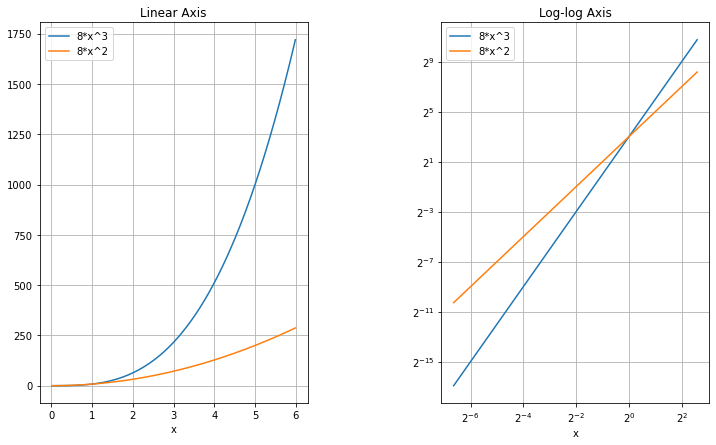

In [4]:
plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x, y1)
plt.xlabel('x')
plt.plot(x, y2)
plt.xlabel('x')
plt.title('Linear Axis')
plt.legend(["8*x^3", "8*x^2"])
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y1, base=2)
plt.loglog(x, y2, base=2)
plt.xlabel('x')
plt.title('Log-log Axis')
plt.legend(["8*x^3", "8*x^2"])
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

### Παραδοτέο 1 

In [18]:
random.seed(2018)  # for reproducibility

# to plot the results in the notebook:
probs = np.arange(0.02, 1, 0.02)

# A dictionary for the initial distibution. 
# We prescribe the initial distribution
phats = []
for p in probs:
    init_probs = {'0-0': 1.0} 


    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    markov_table = {
        '0-0': {'15-0': p, '0-15':1-p},
        '15-0': {'30-0': p, '15-15': 1-p},
        '0-15': {'15-15': p, '0-30': 1-p},
        '30-0': {'40-0': p, '30-15': 1-p},
        '15-15': {'30-15': p, '15-30': 1-p},
        '0-30': {'15-30': p, '0-40': 1-p},
        '40-0': {'GameA': p, '40-15': 1-p},
        '30-15': {'40-15': p, 'Deuce': 1-p},
        '15-30': {'Deuce': p, '15-40': 1-p},
        'Deuce': {'AdvA': p, 'AdvB': 1-p},
        'AdvA': {'GameA': p, 'Deuce': 1-p},
        'AdvB': {'Deuce': p, 'GameB': 1-p},
        '0-40': {'15-40': p, 'GameB': 1-p},
        '40-15': {'GameA': p, 'AdvA': 1-p},
        '15-40': {'AdvB': p, 'GameB': 1-p},
        'GameA':{'GameA':1},
        'GameB':{'GameB':1}
    }

    
    mc = markov_chain(markov_table, init_probs)
    counter = 0
    N = 20000 #Διαλέγουμε μεγάλο Ν για καλύτερη εξομάλυνση
    for i in range(N):
        mc.start()  
        while(mc.running_state !='GameA' and mc.running_state !='GameB'):
            mc.move()
        if(mc.running_state =='GameA'):
            counter += 1
    phat = counter / N
    phats.append(phat)
    print('Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με:',phat, 'όπου p =',p)


Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0 όπου p = 0.02
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0001 όπου p = 0.04
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0003 όπου p = 0.06
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.00055 όπου p = 0.08
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.00105 όπου p = 0.1
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.00365 όπου p = 0.12000000000000001
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.00365 όπου p = 0.13999999999999999
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0081 όπου p = 0.16
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.01375 όπου p = 0.18
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0218 όπου p = 0.19999999999999998
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.0302 όπου p = 0.22
Η πιθανότητα ο PlayerA να κερδίσει το παιχνίδι ισούται με: 0.04635 όπου p 

Text(0.5, 1.0, 'Winning Probability - Probability')

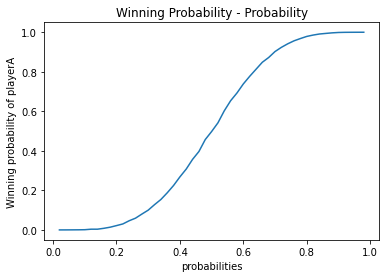

In [19]:
plt.figure()
plt.plot(probs, phats)
# Specify some extra attributes
plt.xlabel('probabilities')
plt.ylabel('Winning probability of playerA')
plt.title('Winning Probability - Probability')

#### Γραμμική παρεμβολή

In [80]:
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step) 
y = 32 * x**3

print(np.polyfit(np.log2(x),np.log2(y),1))

[3. 5.]


Άρα, η κλίση της συνάρτησης σε λογαριθμική κλίμακα ισούται με 3.

### Παραδοτέο 2

In [5]:
from simple_markov_chain_lib import markov_chain  # import markov chain simulator

# Transition Table
markov_table = {
    0: {0: 2/5, 1: 1/2, 2: 1/10},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 1: 1/8, 3: 1/4, 4: 1/8},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)
x = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12]
M = 30

varriances = []
for N in x:
    sample_size = N
    estimates = []
    for estimations in range(M):
        running_total = 0
        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        mc_estimate = running_total / sample_size
        #print("The estimated absorption time is %.2f steps" % mc_estimate)
        estimates.append(mc_estimate)
    varriances.append(stat.variance(estimates))

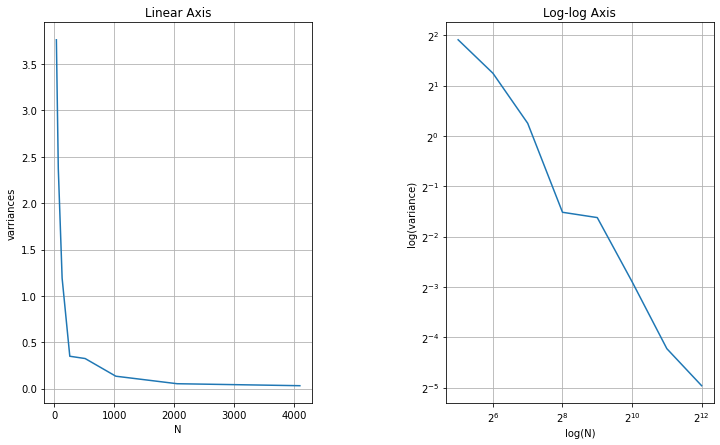

In [8]:
plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x, varriances)
plt.xlabel('N')
plt.ylabel('varriances')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, varriances, base=2)
plt.xlabel('log(N)')
plt.ylabel('log(variance)')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

In [79]:
np.polyfit(np.log2(x),np.log2(varriances),1)

array([-1.07306183,  7.5546171 ])

Πράγματι, για  το δεύτερο γράφημα, λαμβάνουμε ευθεία κλίσης -1.
Το πρώτο γράφημα αποτελεί υπερβολή την οποία αν λογαριθμίσουμε, $log(y)=log(σ^2/N)$
$log(y)= -log(N)+log(σ^2)$ δηλαδή ευθεία κλίσης -1